In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from bs4 import BeautifulSoup
import plotly.graph_objs as go 
import os
import re
import nltk
import plotly.offline as py 
py.init_notebook_mode(connected=True)
import plotly.tools as tls  
from collections import Counter                        
import plotly.figure_factory as ff
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from nltk.corpus import stopwords


In [136]:
df = pd.read_csv("amazon_alexa.tsv",sep='\t')
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [137]:
len(df)

3150

In [138]:
# HOW MANY ALEXA PRODUCTS ARE THERE?
df['variation'].nunique()

16

In [139]:
# HOW MANY COMMENTS HAVE BEEN MADE ABOUT WHICH PRODUCT? 
df['variation'].value_counts()

Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
White                            91
Sandstone Fabric                 90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: variation, dtype: int64

In [140]:
df.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [141]:
df.groupby('rating').describe()

feedback                                   
          count mean  std  min  25%  50%  75%  max
rating                                            
1         161.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
2          96.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
3         152.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0
4         455.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0
5        2286.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0

In [142]:
df['length'] = df['verified_reviews'].apply(len)
df.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


In [143]:
# WHICH ALEXA PRODUCT GETS THE HIGHEST VOTES? 
df.groupby('variation').agg({"rating":"mean"}).sort_values('rating', ascending = False).head()

,rating
variation,
Walnut Finish,4.888889
Oak Finish,4.857143
Charcoal Fabric,4.730233
Heather Gray Fabric,4.694268
Configuration: Fire TV Stick,4.591429


In [144]:
# HOW MANY POSITIVE FEEDBACKS ARE THERE? 
# 1 = Positive , 0 = negative
df["feedback"].value_counts().head()

1    2893
0     257
Name: feedback, dtype: int64

In [145]:
#HOW MANY POSITIVE AND NEGATIVE FEEDBACKS ARE THERE ?
trace0 = go.Bar(
            x = df[df["feedback"]== 1]["feedback"].value_counts().index.values,
            y = df[df["feedback"]== 1]["feedback"].value_counts().values,
            name='Positive Feedback')

trace1 = go.Bar(
            x = df[df["feedback"]== 0]["feedback"].value_counts().index.values,
            y = df[df["feedback"]== 0]["feedback"].value_counts().values,
            name='Negative Feedback')


data = [trace0, trace1]
layout = go.Layout(yaxis=dict(title='Count'),
                   xaxis=dict(title='Feedback'),title='Feedback Distribution')

fig = go.Figure(data=data, layout=layout)
fig.data[0].marker.line.width = 4
fig.data[0].marker.line.color = "black"
fig.data[1].marker.line.width = 4
fig.data[1].marker.line.color = "black"
py.iplot(fig)

In [146]:
# AVERAGE VOTES OF THE PRODUCTS 
rating = df.groupby('variation').agg({"rating":"mean"})
rating['variation'] = rating.index
rating.reset_index(drop=True)

trace = go.Bar(x=rating['variation'], y=rating['rating'])

layout = go.Layout(yaxis=dict(title='Average Rating'),
                   xaxis=dict(title='Alexa Product'),title='Product - Avarage Rating Distribution')

fig = go.Figure(data=trace, layout=layout)
fig.data[0].marker.line.width = 2
fig.data[0].marker.line.color = "black"
py.iplot(fig)

In [147]:
# HOW MUCH WAS USED FROM WHICH VOTES?
trace = go.Bar(
            x = df["rating"].value_counts().index.values,
            y = df["rating"].value_counts().values,
            name='Quantity')

layout = go.Layout(yaxis=dict(title='Quantity'),
                   xaxis=dict(title='Ratings'),title='# of Votes Quantity')

fig = go.Figure(data=trace, layout=layout)
fig.data[0].marker.line.width = 2
fig.data[0].marker.line.color = "black"
py.iplot(fig)

In [148]:
# importing the dataset
dataset = pd.read_csv('amazon_alexa.tsv', delimiter = '\t', quoting = 3) 

In [149]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [150]:
###CLEANING THE TEXT

In [151]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize

In [152]:
# It is a process of normalization
text2 = "Kiss kissed kisses know knowing last lasting"
stemmer = PorterStemmer()
Norm_Word= stemmer.stem(text2)
Tokens = text2.split()
" ".join(stemmer.stem(token) for token in Tokens)

'kiss kiss kiss know know last last'

In [153]:
STOPWORDS = set(stopwords.words('english'))
corpus=[]
for i in range(0,3150):
    review = re.sub('[^a-zA-Z]', ' ', Data['verified_reviews'][i])
    review = review.lower()
    review = review.split()
    stemmer = PorterStemmer()
    review = [stemmer.stem(token) for token in review if not token in STOPWORDS]
    #contain all words that are not in stopwords dictionary
    review=' '.join(review)
    corpus.append(review)
corpus

['love echo',
 'love',
 'sometim play game answer question correctli alexa say got wrong answer like abl turn light away home',
 'lot fun thing yr old learn dinosaur control light play game like categori nice sound play music well',
 'music',
 'receiv echo gift need anoth bluetooth someth play music easili access found smart speaker wait see els',
 'without cellphon cannot use mani featur ipad see use great alarm u r almost deaf hear alarm bedroom live room reason enough keep fun ask random question hear respons seem smartbon polit yet',
 'think th one purchas work get one everi room hous realli like featur offer specifili play music echo control light throughout hous',
 'look great',
 'love listen song heard sinc childhood get news weather inform great',
 'sent year old dad talk constantli',
 'love learn knew thing eveyday still figur everyth work far easi use understand make laugh time',
 'purchas mother knee problem give someth tri come get around fast like enjoy littl big thing ale

In [154]:
words = []
for i in range(0,len(corpus)):
    words = words + (re.findall(r'\w+', corpus[i]))# words cantain all the words in the dataset
words

['love',
 'echo',
 'love',
 'sometim',
 'play',
 'game',
 'answer',
 'question',
 'correctli',
 'alexa',
 'say',
 'got',
 'wrong',
 'answer',
 'like',
 'abl',
 'turn',
 'light',
 'away',
 'home',
 'lot',
 'fun',
 'thing',
 'yr',
 'old',
 'learn',
 'dinosaur',
 'control',
 'light',
 'play',
 'game',
 'like',
 'categori',
 'nice',
 'sound',
 'play',
 'music',
 'well',
 'music',
 'receiv',
 'echo',
 'gift',
 'need',
 'anoth',
 'bluetooth',
 'someth',
 'play',
 'music',
 'easili',
 'access',
 'found',
 'smart',
 'speaker',
 'wait',
 'see',
 'els',
 'without',
 'cellphon',
 'cannot',
 'use',
 'mani',
 'featur',
 'ipad',
 'see',
 'use',
 'great',
 'alarm',
 'u',
 'r',
 'almost',
 'deaf',
 'hear',
 'alarm',
 'bedroom',
 'live',
 'room',
 'reason',
 'enough',
 'keep',
 'fun',
 'ask',
 'random',
 'question',
 'hear',
 'respons',
 'seem',
 'smartbon',
 'polit',
 'yet',
 'think',
 'th',
 'one',
 'purchas',
 'work',
 'get',
 'one',
 'everi',
 'room',
 'hous',
 'realli',
 'like',
 'featur',
 'offer

In [155]:
len(words)

39179

In [156]:
from collections import Counter
words_counts = Counter(words)
print(words_counts)

Counter({'love': 1064, 'echo': 868, 'great': 729, 'use': 718, 'work': 650, 'alexa': 633, 'music': 540, 'like': 535, 'sound': 427, 'one': 371, 'set': 364, 'get': 354, 'devic': 348, 'dot': 347, 'easi': 342, 'play': 333, 'speaker': 307, 'product': 284, 'good': 278, 'thing': 276, 'amazon': 260, 'time': 257, 'home': 221, 'would': 218, 'still': 206, 'show': 203, 'realli': 193, 'light': 192, 'bought': 189, 'smart': 184, 'purchas': 180, 'connect': 179, 'day': 178, 'new': 177, 'better': 177, 'ask': 176, 'need': 175, 'much': 172, 'prime': 170, 'also': 169, 'learn': 168, 'qualiti': 166, 'well': 164, 'want': 156, 'fun': 155, 'room': 153, 'far': 145, 'listen': 143, 'alarm': 142, 'buy': 141, 'even': 137, 'got': 133, 'turn': 133, 'tv': 127, 'plu': 125, 'make': 124, 'tri': 122, 'hous': 120, 'everyth': 120, 'go': 120, 'screen': 120, 'video': 117, 'app': 115, 'featur': 114, 'littl': 109, 'say': 107, 'abl': 107, 'enjoy': 107, 'look': 106, 'know': 106, 'weather': 105, 'spot': 104, 'voic': 103, 'clock': 10

In [157]:
most_common_words = sorted(words_counts.items(), key=lambda x: x[1], reverse=True)
most_common_words

[('love', 1064),
 ('echo', 868),
 ('great', 729),
 ('use', 718),
 ('work', 650),
 ('alexa', 633),
 ('music', 540),
 ('like', 535),
 ('sound', 427),
 ('one', 371),
 ('set', 364),
 ('get', 354),
 ('devic', 348),
 ('dot', 347),
 ('easi', 342),
 ('play', 333),
 ('speaker', 307),
 ('product', 284),
 ('good', 278),
 ('thing', 276),
 ('amazon', 260),
 ('time', 257),
 ('home', 221),
 ('would', 218),
 ('still', 206),
 ('show', 203),
 ('realli', 193),
 ('light', 192),
 ('bought', 189),
 ('smart', 184),
 ('purchas', 180),
 ('connect', 179),
 ('day', 178),
 ('new', 177),
 ('better', 177),
 ('ask', 176),
 ('need', 175),
 ('much', 172),
 ('prime', 170),
 ('also', 169),
 ('learn', 168),
 ('qualiti', 166),
 ('well', 164),
 ('want', 156),
 ('fun', 155),
 ('room', 153),
 ('far', 145),
 ('listen', 143),
 ('alarm', 142),
 ('buy', 141),
 ('even', 137),
 ('got', 133),
 ('turn', 133),
 ('tv', 127),
 ('plu', 125),
 ('make', 124),
 ('tri', 122),
 ('hous', 120),
 ('everyth', 120),
 ('go', 120),
 ('screen', 120)

In [158]:
most_commmom_wordList = []
most_commmom_CountList = []
for x, y in most_common_words:
    most_commmom_wordList.append(x)
    most_commmom_CountList.append(y)

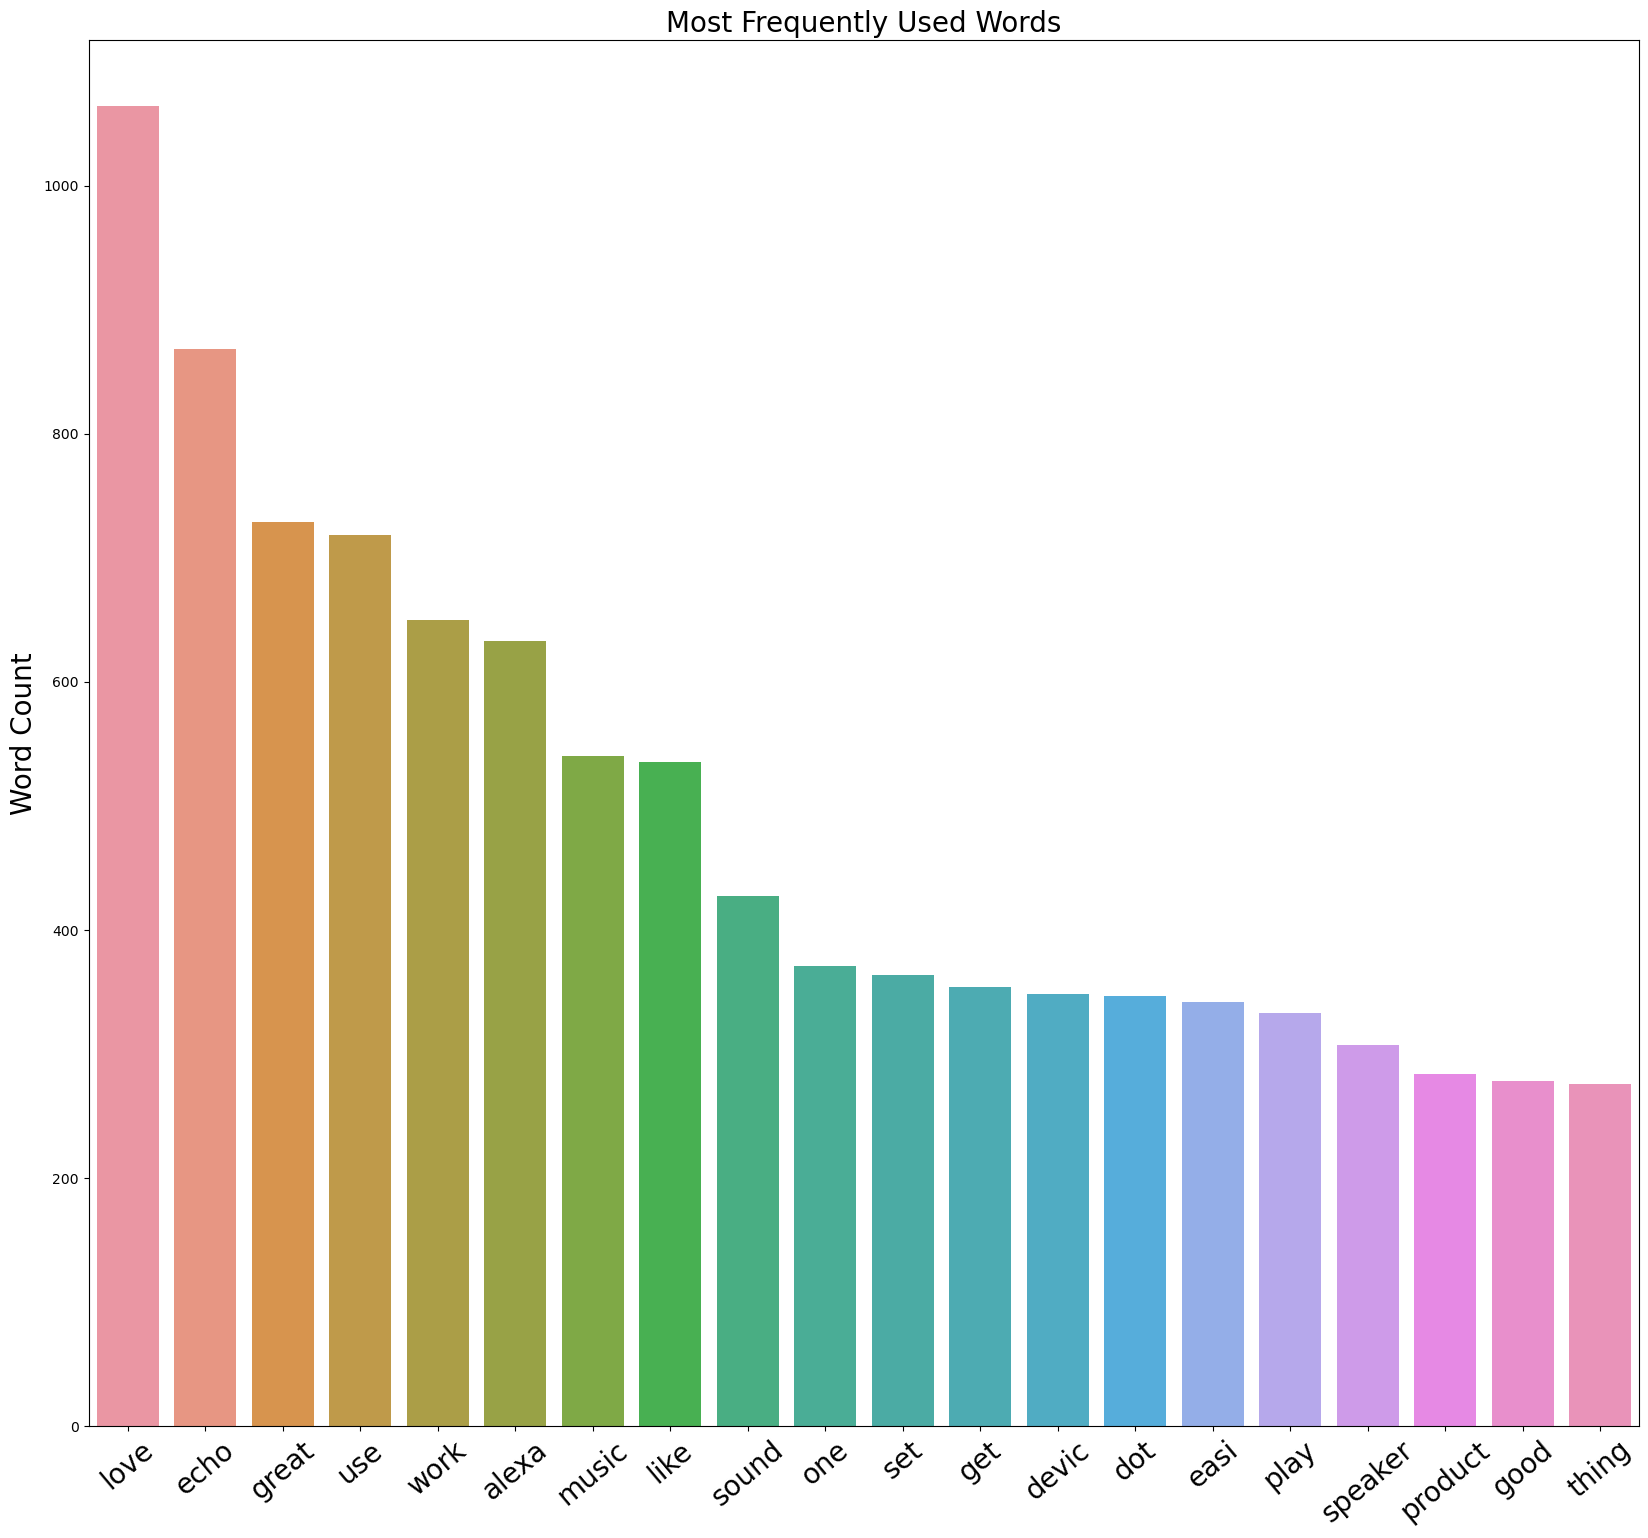

In [159]:
import seaborn as sns
plt.figure(figsize=(20,18))
plot = sns.barplot(x=most_commmom_wordList[0:20], y=most_commmom_CountList[0:20])
plt.ylabel('Word Count', fontsize=20)
plt.xticks(rotation=40, fontsize=20)
plt.title('Most Frequently Used Words', fontsize=20)
plt.show()


In [160]:
# creating the Bag of words Model
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=1500)
X=cv.fit_transform(corpus).toarray()
y=dataset.iloc[:,4].values

In [161]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [162]:
import xgboost as xgb

In [163]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)
       
    


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [164]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [165]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [166]:
cm

array([[ 16,  38],
       [  5, 571]], dtype=int64)

In [167]:
from sklearn.metrics import f1_score

# Calculate the F-score
f_score = f1_score(y_test, y_pred)

# Show the score
print("F-score: %", f_score*100)


F-score: % 96.37130801687763
